In [1]:
# coding: utf-8
from sympy import *
from sympy.abc import psi,phi,eta

init_printing()
f,ck,c = symbols('f ck c', real=True)
sigma, kappa = symbols(r'\sigma \kappa', real=True)
kx, ky, kh =  symbols('k_x k_y k_h', real=True)
u,v =  symbols('u v')

def subsigma(M):
    M = M.subs(f**2 + ck**2,  sigma**2)
    M = M.subs(f**2 + c**2*kappa**2, sigma**2)
    return M
    
def simplifysigma(M):
    M = M.subs(sigma, sqrt(f**2 + ck**2) )
    M = simplify(M)
    return subsigma(M)
    
def subkappa(M):
    M = M.subs(kx**2 + ky**2,  kappa**2)
    M = M.subs(kh*kh.conjugate(), kappa**2)
    M = M.subs(kx*kx.conjugate() + ky*ky.conjugate(), kappa**2)
    return M

def simplifykappa(M):
    M = M.subs(kappa, sqrt(kx**2 + ky**2))
    M = M.subs(kh, sqrt(kx**2 + ky**2))
    M = simplify(M)
    return subkappa(M)
    
def subck(M):
    return M.subs(ck,c*kappa)

In [2]:
A = Matrix(( [0, 1j*f,0],[-1j*f, 0, -1j*ck],[0,1j*ck,0]))
L = A.eigenvals()
X = A.eigenvects()
print('Eigenvectors: ')

Eigenvectors: 


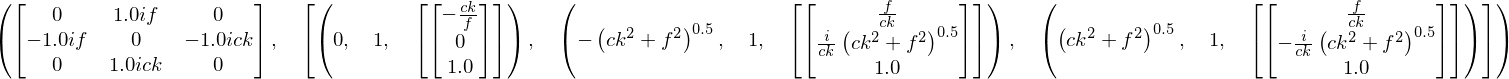

In [3]:
A,X


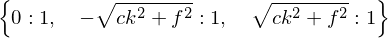

In [4]:
A.eigenvals()

In [5]:
XX = A.diagonalize()[0]
XX = subsigma(XX)
sig = sqrt(f**2 + ck**2)

NORM = eye(3)
NORM[0,0] = f/sig
NORM[1,1] = ck/(sig*sqrt(2))
NORM[2,2] = ck/(sig*sqrt(2))
XN = subsigma(XX*NORM)

#CONJ = eye(3)
#CONJ[1,1] = -1
#XNCT = (CONJ*XN).transpose()
XNCT = XN.conjugate().transpose()
#XNCT = subsigma(XNCT)
 
#------------Check-----------#
ID = simplifysigma(XN*XNCT)
print 'Identity matrix:'

Identity matrix:


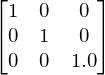

In [6]:
ID

In [7]:
print 'Norm. Eigenvector matrix Xn:'

Norm. Eigenvector matrix Xn:


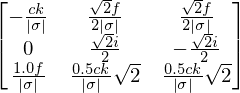

In [8]:
XN

In [9]:
W = Matrix( [psi, -phi, c*eta/kappa] ) * kappa ** 2
U = Matrix( [u,v,eta] )
P = Matrix(( [-1j*ky, 1j*kx, 0],[1j*kx,1j*ky,0],[0,0,kappa] ))

Pinv = simplifykappa(P.inv())
XNCTinv = simplifysigma(XNCT.inv())

Q = Pinv*(XNCTinv)
Q = simplifysigma(Q)
Q = simplifykappa(Q)
Q = subck(Q)

inversion:


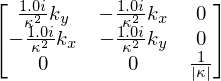

In [10]:
print 'inversion:'; Pinv

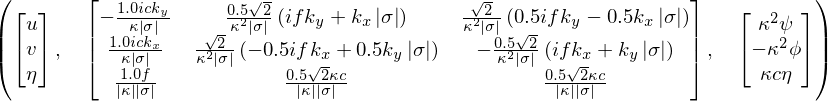

In [11]:
U,Q,W

In [12]:
NORM = eye(3)
NORM[2,2] = c
U = NORM*U
#Q = NORM*Q
#W = NORM*W

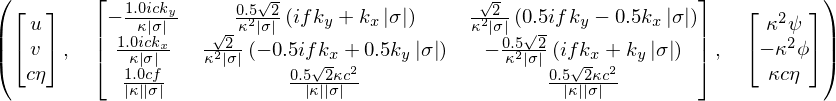

In [13]:
U, Q, W

In [14]:
#RHS BB*
N = XNCT*W
B = expand(subck(N / kappa))
B = simplifysigma(B)

In [15]:
collect_list = [psi*psi.conjugate(), eta*eta.conjugate(), phi*phi.conjugate(),
                psi*phi.conjugate(), psi*eta.conjugate(),
                phi*psi.conjugate(), phi*eta.conjugate(),
                eta*psi.conjugate(), eta*phi.conjugate()]

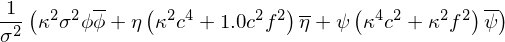

In [16]:
BB2 = subck(simplifykappa(expand(B.conjugate().dot(B))))
collect(BB2,collect_list)

In [29]:
kappa**2 * psi*psi.conjugate() + kappa**2 * phi*phi.conjugate() + c**2 * eta*eta.conjugate()

In [17]:
#LHS uu*
U.transpose().conjugate()*U

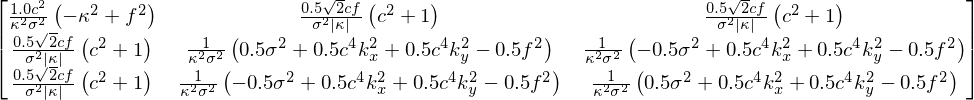

In [18]:
simplifykappa(Q.transpose()*Q)

In [19]:
#U=[Q]W
QW = Q*W

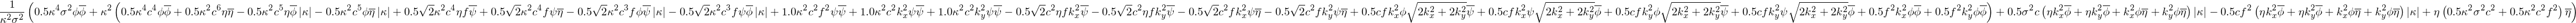

In [20]:
#collect(subck(simplifykappa(expand(QW.transpose().conjugate()*QW))), collect_list)
QW2 = QW.conjugate().dot(QW)
QW2 = simplifysigma(subck((simplifykappa(expand(QW.conjugate().dot(QW))))))
QW2 = collect(QW2,collect_list)
QW2

In [21]:
simplifykappa(collect( U.conjugate().dot((P.conjugate().transpose()*P)*U) , 
        [u*u.conjugate(), v*v.conjugate(), eta*eta.conjugate()]))

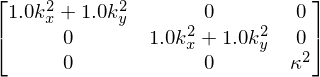

In [22]:
subkappa(P.conjugate().transpose()*P)

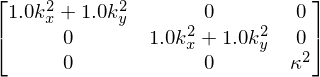

In [23]:
P*P.conjugate().transpose()

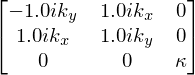

In [24]:
P

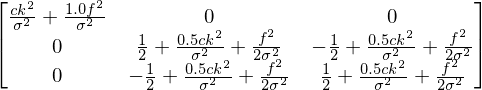

In [25]:
XNCT*XN

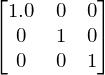

In [26]:
simplifysigma(_)

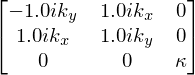

In [27]:
P

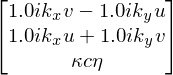

In [28]:
P*U

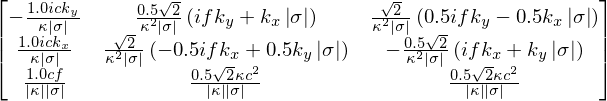

In [34]:
Q

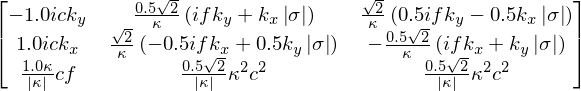

In [32]:
Q*kappa*abs(sigma)

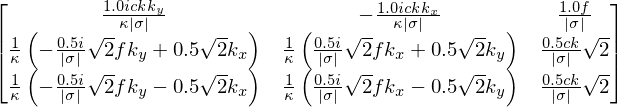

In [33]:
XNCT*P/kappa

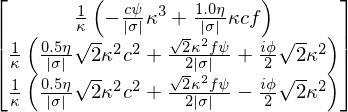

In [37]:
subck(XNCT)*W/kappa

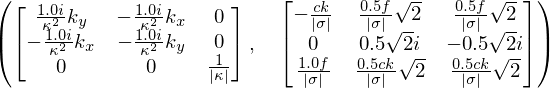

In [38]:
Pinv,XNCTinv

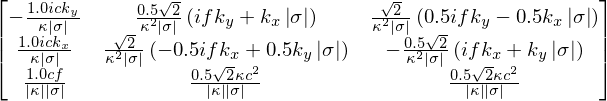

In [39]:
Q

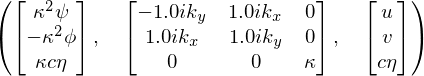

In [40]:
W,P,U

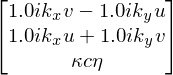

In [41]:
P*U

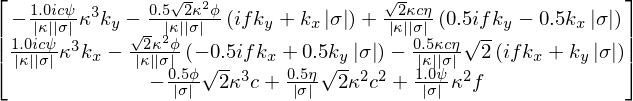

In [47]:
Q = kappa*Pinv*(XNCTinv)
Q = simplifysigma(Q)
Q = simplifykappa(Q)
Q = subck(Q)
Q*W

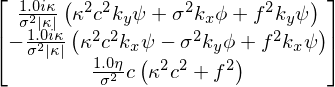

In [48]:
simplify(Q*B)

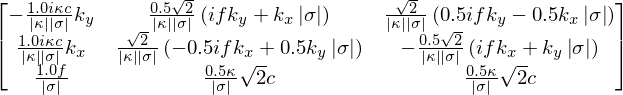

In [49]:
Q